In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
iris_data = pd.DataFrame(iris.data)

In [37]:
iris_data.columns = iris.feature_names

In [82]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
iris_data.head()
iris_data.shape

(150, 4)

In [43]:
iris_data.shape

(150, 4)

In [47]:
X=iris.data
y=iris.target

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
#since it is in 4 dim , convert it to 2 dim using feature scsaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
x_scaled.shape

(100, 4)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled_test = scaler.fit_transform(X_test)
x_scaled_test.shape

(50, 4)

In [62]:
#Apply PCA for dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scale_train = pca.fit_transform(x_scaled)
pca_scale_train.shape
pca_scale_test = pca.fit_transform(x_scaled_test)
pca_scale_test.shape

(50, 2)

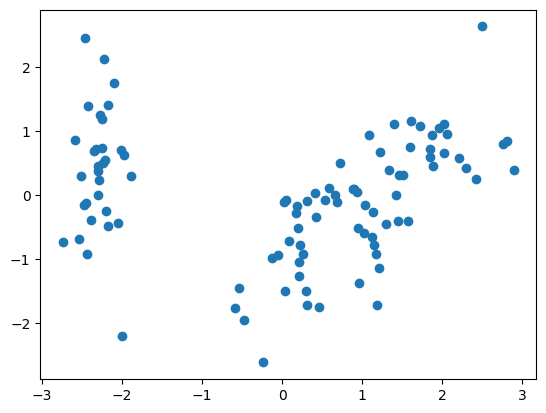

In [65]:
plt.scatter(pca_scale_train[:,0],pca_scale_train[:,1])

Text(0, 0.5, 'Eucledian Distance')

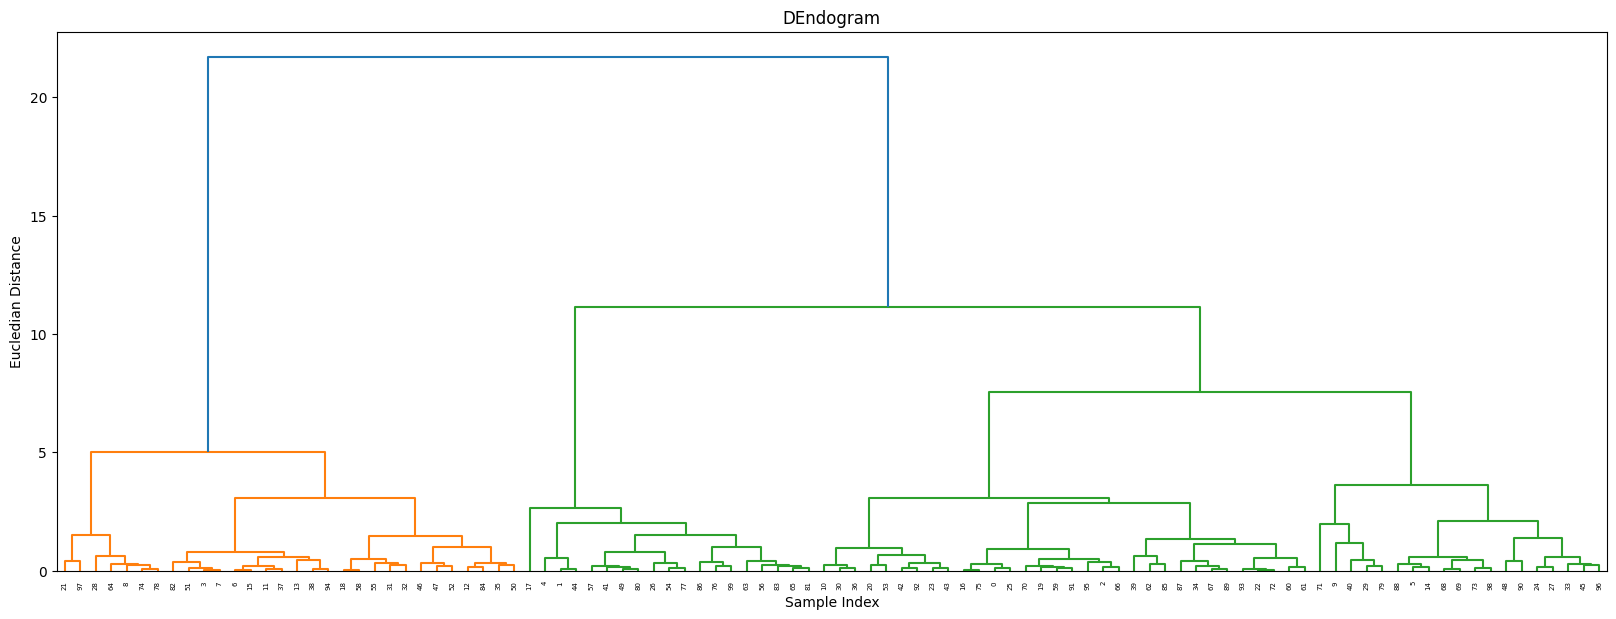

In [68]:
##Agglomerative Clustering
#Construct a dendogram
import scipy.cluster.hierarchy as sc 
plt.figure(figsize=(20,7))
plt.title("DEndogram")
sc.dendrogram(sc.linkage(pca_scale_train,method="ward"))
plt.xlabel('Sample Index')
plt.ylabel("Eucledian Distance")


In [73]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage='ward')
cluster.fit(pca_scale_train)
cluster.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [81]:
#Sieclutte score
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2,11):
    cluster.fit(x_scaled)
    score = silhouette_score(x_scaled,cluster.labels_)
silhouette.append(score)  
print(silhouette) 

[0.5604478086733395]
